# Data Augmentation

Data augmentation:

Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
import imageio as im
from matplotlib.pyplot import imread
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [2]:
#plots images with labels within jupyter notebook
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [3]:
gen = ImageDataGenerator(
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.15,
                            zoom_range=0.1,
                            channel_shift_range=10.,
                            horizontal_flip=True
                        )

In [4]:
image_path = 'download.jpg'

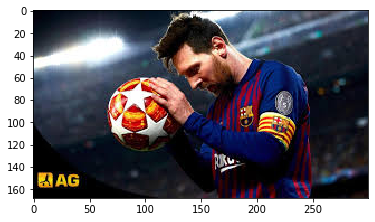

In [5]:
#obtain image
image = np.expand_dims(im.imread(image_path),0)
plt.imshow(image[0])

In [6]:
#Generate batches of augmented images from this image
aug_iter =gen.flow(image)
aug_iter

In [7]:
#Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

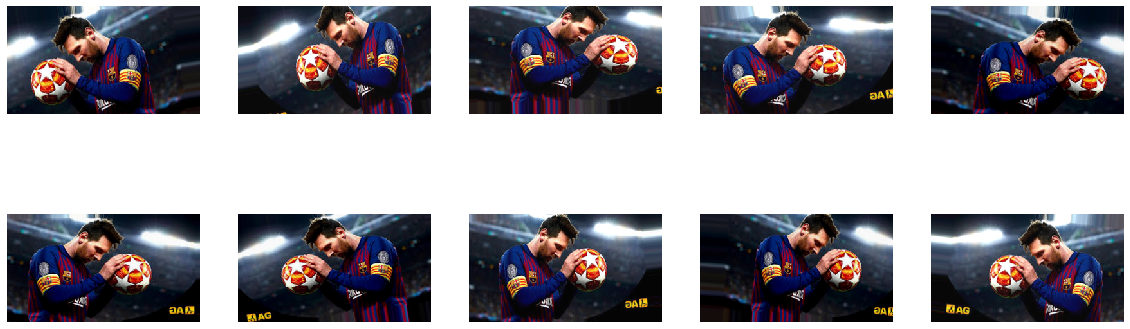

In [8]:
#Augmented images
plots(aug_images,figsize=(20,7),rows=2)